In [1]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sb
import sklearn as skl
import time as t
from IPython.display import display, clear_output


from geopy.geocoders import Nominatim # for latitudes and longitudes
import json
import pickle

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.2.4
Sklearn  0.24.2


### Importing Dataset

In [ ]:
CLOUD = False

if CLOUD:
    import os
    os.environ['KAGGLE_USERNAME'] = "umutakta"
    os.environ['KAGGLE_KEY']      = "a471e5474add8d57cadac3cc5ff2b1d6"  
    !pip install --upgrade kaggle
    !kaggle competitions download -c competitive-data-science-predict-future-sales
    DATA_PATH = "/work/Strive_School/Feature_Engineering_(Module_4)/Day_6_Feature_Selection/competitive-data-science-predict-future-sales/"

else:
    DATA_PATH = "/work/Data_Sets/competitive-data-science-predict-future-sales/"

DATA_PATH

'/work/Data_Sets/competitive-data-science-predict-future-sales/'

**Creating Data Frame**

In [ ]:
df_item_categ=pd.read_csv(DATA_PATH+"item_categories_eng.csv")
df_items=pd.read_csv(DATA_PATH+"items_eng.csv")
df=pd.read_csv(DATA_PATH+"sales_train.csv")
df_sample=pd.read_csv(DATA_PATH+"sample_submission.csv")
df_shops=pd.read_csv(DATA_PATH+"shops_eng.csv")
df_test=pd.read_csv(DATA_PATH+"test.csv")

In [ ]:
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

Turning date column to **date type**

In [ ]:
from datetime import datetime

df["date"]=df['date'].apply(lambda x:datetime.strptime(x, '%d.%m.%Y'))


### Deleting Outliers

**Item Count Day**

In [ ]:
df=df.drop(df.loc[df.item_cnt_day>800].index.tolist())

<AxesSubplot:xlabel='item_cnt_day'>

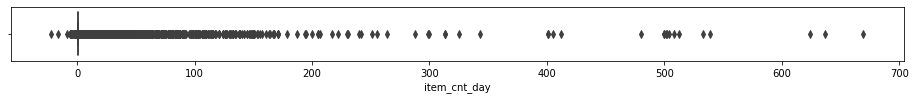

In [ ]:
plt.figure(figsize=(16,1))
sb.boxplot(x=df.item_cnt_day)

**Item Price**

In [ ]:
df=df.drop(df.loc[df.item_price>10000].index.tolist())

<AxesSubplot:xlabel='item_price'>

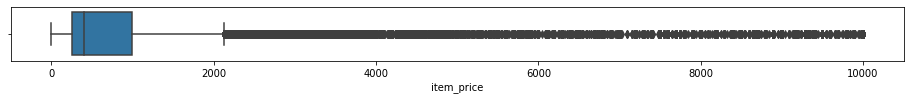

In [ ]:
plt.figure(figsize=(16,1))
sb.boxplot(x=df.item_price)

#### Creating new data frame for only 2013,2014,2015

In [ ]:
df_2013=df[(df.date<"01-01-2014") & ("31-12-2012"<df.date)]
df_2014=df[(df.date<"01-01-2015") & ("31-12-2013"<df.date)]
df_2015=df[(df.date<"01-01-2016") & ("31-12-2014"<df.date)]

** Grouping monthly sales **

In [ ]:
df_2013['total_income_13']=df_2013.item_price*df_2013.item_cnt_day
df13_total=df_2013.groupby(['date_block_num']).sum()

df_2014['total_income_14']=df_2014.item_price*df_2014.item_cnt_day
df14_total=df_2014.groupby(['date_block_num']).sum()

df_2015['total_income_15']=df_2015.item_price*df_2015.item_cnt_day
df15_total=df_2015.groupby(['date_block_num']).sum()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

** Plot by total income for 2013 and 2014**

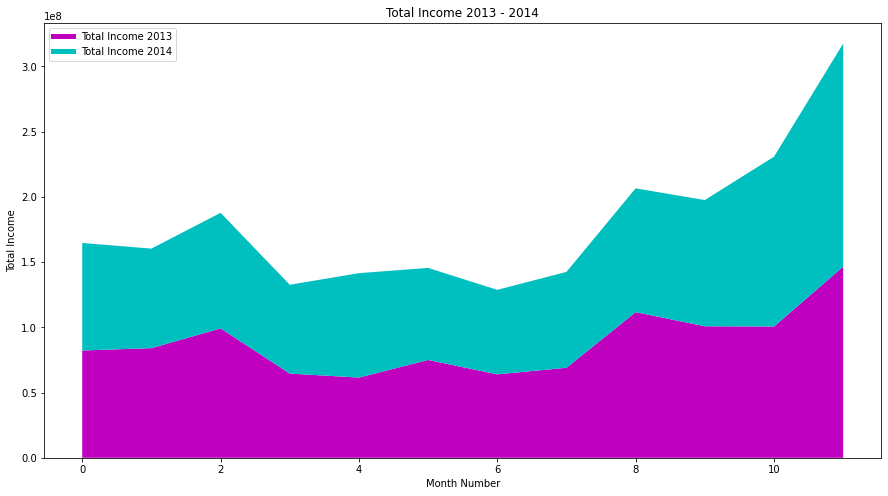

In [ ]:
plt.subplots(figsize=(15,8))

plt.plot([],[],color='m', label='Total Income 2013', linewidth=5)
plt.plot([],[],color='c', label='Total Income 2014', linewidth=5)

plt.stackplot(df13_total.index, df13_total.total_income_13, df14_total.total_income_14,colors=['m','c'])

plt.xlabel('Month Number')
plt.ylabel('Total Income')
plt.title('Total Income 2013 - 2014')
plt.legend(loc='upper left')
plt.show()

** Total Income Plotting Until October in 2013,2014 and 2015 **

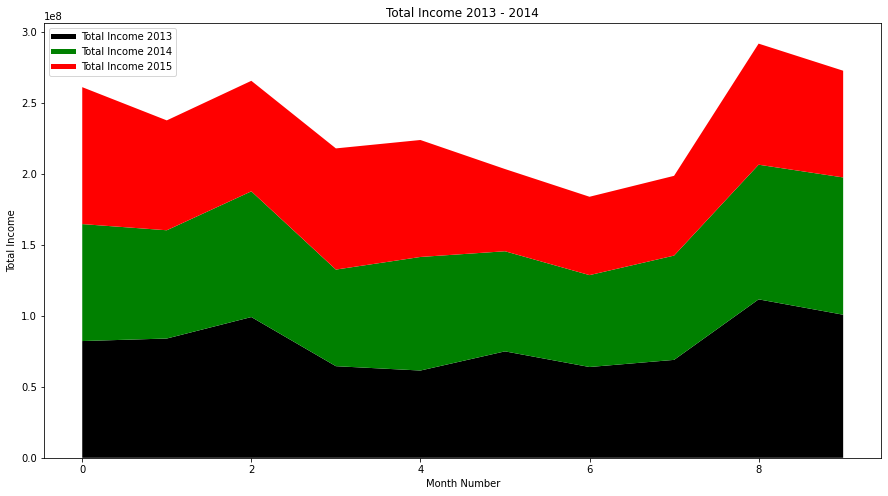

In [ ]:
plt.subplots(figsize=(15,8))

plt.plot([],[],color='k', label='Total Income 2013', linewidth=5)
plt.plot([],[],color='g', label='Total Income 2014', linewidth=5)
plt.plot([],[],color='r', label='Total Income 2015', linewidth=5)

plt.stackplot(df13_total.index[:10], df13_total.loc[:9].total_income_13, 
    df14_total.loc[:21].total_income_14,df15_total.total_income_15,colors=['k','g',"r"])

plt.xlabel('Month Number')
plt.ylabel('Total Income')
plt.title('Total Income 2013 - 2014')
plt.legend(loc='upper left')
plt.show()

#### Interesting with shop id

Finding different shops between years 2013, 2014 and 2015

In [ ]:
set_difference_13_14 = set(df_2013.shop_id.unique()) - set(df_2014.shop_id.unique())
difference_13_14 = list(set_difference_13_14)

set_difference_13_15 = set(df_2013.shop_id.unique()) - set(df_2015.shop_id.unique())
difference_13_15 = list(set_difference_13_15)

difference_13_14.extend(difference_13_15)
difference_13=difference_13_14
difference_13

[0, 1, 32, 8, 23, 0, 1, 32, 8, 13, 23]

In [ ]:
set_difference_14_15 = set(df_2014.shop_id.unique()) - set(df_2015.shop_id.unique())
difference_14_15 = list(set_difference_14_15)

set_difference_14_13 = set(df_2014.shop_id.unique()) - set(df_2013.shop_id.unique())
difference_14_13 = list(set_difference_14_13)

difference_14_13.extend(difference_14_15)
difference_14=difference_14_13
difference_14

[33, 34, 39, 40, 48, 20, 13]

In [ ]:
set_difference_15_13 = set(df_2015.shop_id.unique()) - set(df_2013.shop_id.unique())
difference_15_13 = list(set_difference_15_13)

set_difference_15_14 = set(df_2015.shop_id.unique()) - set(df_2014.shop_id.unique())
difference_15_14 = list(set_difference_15_14)

difference_15_14.extend(difference_15_13)
difference_15=difference_15_14
difference_15

[11, 36, 33, 34, 36, 39, 40, 11, 48, 20]

In [ ]:
# Dropping different shops from 2013 and 2014
df_2013_drop_shops=df_2013.groupby(["shop_id"]).sum().drop(difference_13, axis=0)
df_2014_drop_shops=df_2014.groupby(["shop_id"]).sum().drop(difference_14, axis=0)
df_2015_drop_shops=df_2015.groupby(["shop_id"]).sum().drop(difference_15, axis=0)

** Plot Total Income Per Shop **

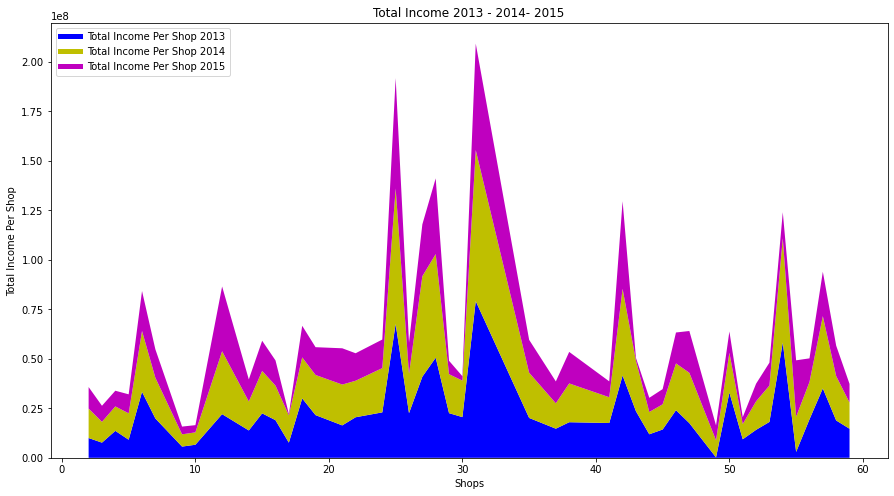

In [ ]:
plt.subplots(figsize=(15,8))

plt.plot([],[],color='b', label='Total Income Per Shop 2013', linewidth=5)
plt.plot([],[],color='y', label='Total Income Per Shop 2014', linewidth=5)
plt.plot([],[],color='m', label='Total Income Per Shop 2015', linewidth=5)

plt.stackplot(df_2013_drop_shops.index, df_2013_drop_shops.total_income_13, 
    df_2014_drop_shops.total_income_14,df_2015_drop_shops.total_income_15,colors=['b','y',"m"])

plt.xlabel('Shops')
plt.ylabel('Total Income Per Shop')
plt.title('Total Income 2013 - 2014- 2015')
plt.legend(loc='upper left')
plt.show()

## Shop Data

### Cleaning Data

**Dropping duplicate shops**



In [ ]:
df_shops=df_shops.drop([10,39,0]).reset_index()

** Identifying Cities **

In [ ]:
#Cleaning shop name
df_shops['shop_names_cleaned'] = [df_shops['shop_name'][i].replace('!', '').replace('?', '')
    .replace('²', '').replace('" ', ' ').replace(' "', ' ').replace('"', '')
    .replace('-', ' ').strip() for i in range(df_shops.shape[0])]


cities= lambda x: x.split(" ")[0]
df_shops["city"]=df_shops.shop_names_cleaned.map(cities)
for i in range(len(df_shops["city"])):
    if df_shops["city"][i]=="St.":
        df_shops["city"][i]="Saint Petersburg"
    if df_shops["city"][i]=="Adygeya":
        df_shops["city"][i]="Tul’skiy"


df_shops=df_shops.replace(["St.","Adygea","N.Novgorod",'RostovNaDon','RostovNaDonu','Sergiev','Volga','Zhukovsky'],
    ["Saint Petersburg","Tul’skiy","Nizhniy Novgorod","Rostov","Rostov","Sergiyev Posad","Tver","Moscow"])


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


** Identifying Shops **

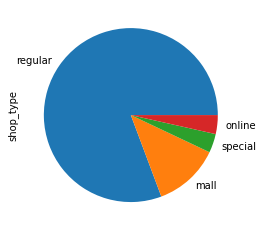

In [ ]:
df_shops['shop_type'] = 'regular' # By default all shops are regular shops

#there is some overlap in tc and mall, mall is given precedence
df_shops.loc[ df_shops['shop_name'].str.contains(r'tc'), 'shop_type' ]               = 'tc'
df_shops.loc[ df_shops['shop_name'].str.contains(r'mall|center|mega'), 'shop_type' ] = 'mall'
df_shops.loc[ df_shops.shop_id.isin([9,20]), 'shop_type' ]                             = 'special'
df_shops.loc[ df_shops.shop_id.isin([12,55]), 'shop_type' ]                            = 'online'

df_shops['shop_type'].value_counts().plot.pie();

latitude_list, longitude_list=[],[]

for i in df_shops.cleaned:

    geolocator = Nominatim(user_agent="foursquare_agent")
    
    #geolocator = Nominatim(user_agent="my_user_agent")
    location = geolocator.geocode(i)
    try:
        latitude = location.latitude
        latitude_list.append(latitude)
    except:
        latitude_list.append(np.nan)

    try:    
        longitude = location.longitude
        longitude_list.append(longitude)
    except:
        longitude_list.append(np.nan)

df_shops["latitude"]=latitude_list
df_shops["longitude"]=longitude_list



### Russia Population Dataset

In [ ]:
df_pop=pd.read_csv("/work/Data_Sets/competitive-data-science-predict-future-sales/ru_population.csv")


In [ ]:
city_difference= set(df_shops.city.unique())-set(df_pop.city.unique())
city_difference

{'Digital', 'Internet', 'Outbound'}

### Creating New Merged Dataframe

In [ ]:
df_new_shop=pd.merge(df_pop, df_shops, on=['city'])
df_new_shop=df_new_shop.drop(["country","iso2","admin_name","index","shop_name","shop_name"],axis=1).drop_duplicates(subset=['shop_names_cleaned']).reset_index()
df_new_shop=df_new_shop.drop(["shop_names_cleaned","lat","lng","index"],axis=1)

In [ ]:
online_shop_1 = {'city':"no_city","capital":"no_capital","population":0,
    "population_proper":0,"shop_id":55,"shop_type":"online"}

online_shop_2 = {'city':"no_city","capital":"no_capital","population":0,
    "population_proper":0,"shop_id":12,"shop_type":"online"}


online_shop_3 = {'city':"no_city","capital":"no_capital","population":0,
    "population_proper":0,"shop_id":9,"shop_type":"online"}



#append row to the dataframe
df_new_shop = df_new_shop.append(online_shop_1, ignore_index=True)
df_new_shop = df_new_shop.append(online_shop_2, ignore_index=True)
df_new_shop = df_new_shop.append(online_shop_3, ignore_index=True)


** Handling null values**

In [ ]:
df_new_shop.capital.fillna("minor", inplace = True)
df_new_shop.population.fillna(1553925,inplace = True)
df_new_shop.population_proper.fillna(1491855,inplace = True)
df_new_shop.head()

city  capital  population  population_proper  shop_id shop_type
0  Moscow  primary  17125000.0         13200000.0       11   regular
1  Moscow  primary  17125000.0         13200000.0       20   special
2  Moscow  primary  17125000.0         13200000.0       21   regular
3  Moscow  primary  17125000.0         13200000.0       22   regular
4  Moscow  primary  17125000.0         13200000.0       23   regular

In [ ]:
df_new_shop.isnull().sum()

city                 0
capital              0
population           0
population_proper    0
shop_id              0
shop_type            0
dtype: int64

## Item Category Data

In [ ]:
#df_item_categ["main_categories"]=0
find_main_categories=lambda x: x.split("-")[0].strip()
df_item_categ["main_categories"]=df_item_categ.category_name.map(find_main_categories)
df_item_categ.head()

category_name  category_id main_categories
0  PC - Headsets / Headphones            0              PC
1           Accessories - PS2            1     Accessories
2           Accessories - PS3            2     Accessories
3           Accessories - PS4            3     Accessories
4           Accessories - PSP            4     Accessories

## Item Data

### Cleaning

In [ ]:
df_items['item_name'] = df_items['item_name'].str.lower()
df_items['item_name'] = df_items['item_name'].str.replace('.', '')
for i in [r'[^\w\d\s\.]', r'\bthe\b', r'\bin\b', r'\bis\b',
          r'\bfor\b', r'\bof\b', r'\bon\b', r'\band\b',  
          r'\bto\b', r'\bwith\b' , r'\byo\b']:
    df_items['item_name'] = df_items['item_name'].str.replace(i, ' ')
df_items['item_name'] = df_items['item_name'].str.replace(r'\b.\b', ' ').str.strip()


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


** Finding Duplicates **

In [ ]:
dupes = df_items[(df_items.duplicated(subset=['item_name','category_id'],keep=False))]
dupes['in_test'] = dupes.item_id.isin(df_test.item_id.unique())
dupes = dupes.groupby('item_name').agg({'item_id':["count",'first','last'],'in_test':['first','last']})

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


** Removing Duplicates **

In [ ]:
# A) if both item id's are in the test set do nothing
dupes = dupes[(dupes[('in_test', 'first')]==False) | (dupes[('in_test', 'last')]==False)]

# B) if only the first id is in the test set assign this id to both
temp = dupes[dupes[('in_test', 'first')]==True]
keep_first = dict(zip(temp[('item_id', 'last')], temp[('item_id',  'first')]))

# C) if neither id or only the second id is in the test set, assign the second id to both
temp = dupes[dupes[('in_test', 'first')]==False]
keep_second = dict(zip(temp[('item_id', 'first')], temp[('item_id',  'last')]))
item_map = {**keep_first, **keep_second}

** Saving Item Map **

In [ ]:
json_filename = DATA_PATH + 'duplicated_items_replacement.json'

json.dump(item_map, open(json_filename, 'w'), indent=4)

** Replacing **

In [ ]:
df = df.replace({
        'shop_id': json_filename, # replacing obsolete shop id's
        'item_id': json_filename  # fixing duplicate item id's  
})


### Encoding For Item

In [ ]:
df_items['item_name_no_space'] = df_items['item_name'].str.replace(' ', '')
df_items['item_name_first4']   = [x[:4] for x in df_items['item_name_no_space']]
df_items['item_name_first6']   = [x[:6] for x in df_items['item_name_no_space']]
df_items['item_name_first11']  = [x[:11] for x in df_items['item_name_no_space']]
del df_items['item_name_no_space']

df_items.head()

item_id  category_id                                          item_name  \
0        0           40                           power   happiness  plast   
1        1           76  abbyy finereader 12 professional edition full ...   
2        2           40                               glory     glory  unv   
3        3           40                                    blue wave  univ   
4        4           40                                         box  glass   

  item_name_first4 item_name_first6 item_name_first11  
0             powe           powerh       powerhappin  
1             abby           abbyyf       abbyyfinere  
2             glor           gloryg       glorygloryu  
3             blue           bluewa       bluewaveuni  
4             boxg           boxgla          boxglass

## Creating New Data Frame Items With Categories

In [ ]:
df_new_items=pd.merge(df_item_categ, df_items, on=['category_id'])
df_new_items.head()

category_name  category_id main_categories  item_id  \
0  PC - Headsets / Headphones            0              PC     5441   
1  PC - Headsets / Headphones            0              PC    16255   
2  PC - Headsets / Headphones            0              PC    16256   
3  PC - Headsets / Headphones            0              PC    16257   
4           Accessories - PS2            1     Accessories     5606   

                                           item_name item_name_first4  \
0  pc  headset hyperx cloud core gaming stereo  k...             pche   
1                      headphones philips sbc hc8680             head   
2                           headphones ritmix rh 120             head   
3                     headphones ritmix rh 124 black             head   
4  ps2  memory card   mb black  memory card 8mb  ...             ps2m   

  item_name_first6 item_name_first11  
0           pchead       pcheadsethy  
1           headph       headphonesp  
2           headph       headphonesr  
3           headph       headphonesr  
4           ps2mem       ps2memoryca

## Sales Data

### Creating Time Data

In [ ]:
time = pd.DataFrame(data={'date':pd.date_range(start='2013-01-01', end='2015-11-30')})

time['month']          = time.date.dt.month 
time['year']           = time.date.dt.year - 2013
time["day_of_week"]    = time.date.dt.dayofweek + 1
time["day_of_month"]   = time.date.dt.day
time['day_of_year']    = time.date.dt.dayofyear
time["day_of_history"] = time.day_of_year + (365 * time.year)
time['date_block_num'] = time['year']*12 + time['month'] - 1
time.set_index('date', inplace=True)

In [ ]:
days_of_week = ["#mon", "#tue", "#wed", "#thu", "#fri", "#sat", "#sun"]

months = time.groupby(["date_block_num", "day_of_week"]).size().unstack()
months.columns = days_of_week
months["#sat+sun"] = months["#sat"] + months["#sun"]

months["#days"] = months[days_of_week].sum(1)
#months["month_id"]   = months.index%12 + 1

date_block_num_list=list(df.date_block_num.unique())
date_block_num_list.append(34)
months["date_block_num"]=date_block_num_list
months.head()

#mon  #tue  #wed  #thu  #fri  #sat  #sun  #sat+sun  #days  \
date_block_num                                                              
0                  4     5     5     5     4     4     4         8     31   
1                  4     4     4     4     4     4     4         8     28   
2                  4     4     4     4     5     5     5        10     31   
3                  5     5     4     4     4     4     4         8     30   
4                  4     4     5     5     5     4     4         8     31   

                date_block_num  
date_block_num                  
0                            0  
1                            1  
2                            2  
3                            3  
4                            4

** Merging Time and Sales Data **

In [ ]:
months=months.reset_index(drop=True)
df=pd.merge(df, months, on=["date_block_num"])
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-02               0       59    22154      999.00           1.0   
1 2013-01-03               0       25     2552      899.00           1.0   
2 2013-01-05               0       25     2552      899.00          -1.0   
3 2013-01-06               0       25     2554     1709.05           1.0   
4 2013-01-15               0       25     2555     1099.00           1.0   

   #mon  #tue  #wed  #thu  #fri  #sat  #sun  #sat+sun  #days  
0     4     5     5     5     4     4     4         8     31  
1     4     5     5     5     4     4     4         8     31  
2     4     5     5     5     4     4     4         8     31  
3     4     5     5     5     4     4     4         8     31  
4     4     5     5     5     4     4     4         8     31

** Removing shops which don't appear in the test set **

In [ ]:
df = df[df['shop_id'].isin(df_test.shop_id.unique())]


** Merging Item Category Data and Sales Data **

In [ ]:
df=pd.merge(df, df_new_items, on=["item_id"])
df=pd.merge(df, df_new_shop, on=["shop_id"])
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-02               0       59    22154       999.0           1.0   
1 2013-05-16               4       59     2573       249.0           1.0   
2 2013-01-26               0       59     2574       399.0           1.0   
3 2013-01-09               0       59     2574       399.0           1.0   
4 2013-02-24               1       59     2574       399.0           1.0   

   #mon  #tue  #wed  #thu  ...  main_categories  \
0     4     5     5     5  ...           Cinema   
1     4     4     5     5  ...            Music   
2     4     5     5     5  ...            Music   
3     4     5     5     5  ...            Music   
4     4     4     4     4  ...            Music   

                                           item_name  item_name_first4  \
0                                     scene 2012  bd              scen   
1                           del rey lana  born   die              delr   
2  del rey lana  born   die    paradise edition  2cd              delr   
3  del rey lana  born   die    paradise edition  2cd              delr   
4  del rey lana  born   die    paradise edition  2cd              delr   

   item_name_first6  item_name_first11       city  capital population  \
0            scene2        scene2012bd  Yaroslavl    admin   608079.0   
1            delrey        delreylanab  Yaroslavl    admin   608079.0   
2            delrey        delreylanab  Yaroslavl    admin   608079.0   
3            delrey        delreylanab  Yaroslavl    admin   608079.0   
4            delrey        delreylanab  Yaroslavl    admin   608079.0   

  population_proper shop_type  
0          608079.0   regular  
1          608079.0   regular  
2          608079.0   regular  
3          608079.0   regular  
4          608079.0   regular  

[5 rows x 27 columns]

In [ ]:
df.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', '#mon', '#tue', '#wed', '#thu', '#fri', '#sat', '#sun',
       '#sat+sun', '#days', 'category_name', 'category_id', 'main_categories',
       'item_name', 'item_name_first4', 'item_name_first6',
       'item_name_first11', 'city', 'capital', 'population',
       'population_proper', 'shop_type'],
      dtype='object')

In [ ]:
cat_vars = ['shop_id', 'item_id','category_name', 'category_id', 'main_categories',
    'item_name_first4', 'item_name_first6',
    'item_name_first11','city', 'capital','shop_type']
num_vars = ['item_price','#mon', '#tue', '#wed', '#thu', '#fri', '#sat', '#sun',
    '#sat+sun', '#days','population_proper']

x=df[cat_vars+num_vars]
y=df['item_cnt_day']

In [ ]:

cat_4_Models = pipeline.Pipeline(steps=[
    ('one hot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])


num_4_Models=pipeline.Pipeline(steps=[
    (("quantile transformer",preprocessing.QuantileTransformer(n_quantiles=100, random_state=0,
    output_distribution='normal')))])



tree_prepro=compose.ColumnTransformer(transformers=[
    ("categorical",cat_4_Models,cat_vars),
    ("numerical",num_4_Models,num_vars)]) 

tree_prepro

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one hot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['shop_id', 'item_id', 'category_name',
                                  'category_id', 'main_categories',
                                  'item_name_first4', 'item_name_first6',
                                  'item_name_first11', 'city', 'capital',
                                  'shop_type']),
                                ('numerical',
                                 Pipeline(steps=[('quantile transformer',
                                                  QuantileTransformer(n_quantiles=100,
                                                                      output_distribution='normal',
                                                                      random_state=0))]),
                                 ['item_price', '#mon', '#tue', '#wed', '#thu',
                                  '#fri', '#sat', '#sun', '#sat+sun', '#days',
                                  'population_proper'])])

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor


In [ ]:
# YOUR CODE HERE
all_pipelines={
    #"Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": linear_model.Lasso(alpha=0.1),
    "Elastic Net":ElasticNet(random_state=0),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=2),
    "Random Forest Regressor":RandomForestRegressor(max_depth=2, random_state=0),
    "Extra Tree Regressor":ExtraTreesRegressor(n_estimators=10, random_state=0),
    "Gradient Boosting Regressor":GradientBoostingRegressor(random_state=0),
    #"Gradient Hist  Boosting Regressor":HistGradientBoostingRegressor()
    
    }

all_pipelines = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in all_pipelines.items()}

all_pipelines["Gradient Boosting Regressor"]




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['shop_id', 'item_id',
                                                   'category_name',
                                                   'category_id',
                                                   'main_categories',
                                                   'item_name_first4',
                                                   'item_name_first6',
                                                   'item_name_first11', 'city',
                                                   'capital', 'shop_type']),
                                                 ('numerical',
                                                  Pipeline(steps=[('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=100,
                                                                                       output_distribution='normal',
                                                                                       random_state=0))]),
                                                  ['item_price', '#mon', '#tue',
                                                   '#wed', '#thu', '#fri',
                                                   '#sat', '#sun', '#sat+sun',
                                                   '#days',
                                                   'population_proper'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=0))])

In [ ]:
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

results = pd.DataFrame({'Model': [], 'MSE': [], 'RMSE': [], 'Time': []})

for name, pipe in all_pipelines.items():

    start_time = t.time()
    
    preds = pipe.fit(x_train,y_train).predict(x_valid)

    total_time = t.time() - start_time

    results = results.append({"Model": name,
                              "MSE":   mean_squared_error(y_valid, preds),
                              "RMSE":  mean_squared_error(y_valid, preds,squared=False),
                              "Time":  total_time},
                              ignore_index=True)

    
    results_ord = results.sort_values(by=['RMSE'], ascending=True, ignore_index=True)
    results_ord.index += 1 
    clear_output()
    display(results_ord.style.bar(subset=['MSE', 'RMSE'], vmin=0, color='#5fba7d'))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=796ba814-f632-4502-b0d7-7e2f8f9e546d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>